In [1]:
# NO CODE

from prob140 import *
from datascience import *
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

In [2]:
# NO CODE 

shift = -8
p = 1/10
n = 100
mu = n*p + shift
sigma = (n*p*(1-p))**0.5
k = 2
c1 = np.ceil(mu-k*sigma)
c2 = np.floor(mu+k*sigma)
x = np.arange(0, 30)
probs = stats.binom.pmf(x, n, p)
dist2 = Table().values(x+shift).probabilities(probs)
left_tail = np.arange(shift, c1+1)
right_tail = np.arange(c2, n+1)
tails = np.append(left_tail, right_tail)

## Chebyshev's Inequality ##

Markov's inequality gives us upper bounds on the tail probabilities of a non-negative random variable, based only on the expectation. It seems reasonable to think we might be able to do better if we also used the SD of the distribution.

Let $X$ be any random variable (not necessarily non-negative) and let $c$ be any positive number. What can we say about the chance that $X$ is at least $c$ units away from its mean?

Let $\mu = E(X)$ and $\sigma = SD(X)$. Data scientists often use $\sigma$ for SD because $\sigma$ is the Greek for *s*.

We are interested in $P(\vert X - \mu \vert \ge c)$. The figure below shows such a probability. Notice that it is the total of two tail probabilities.

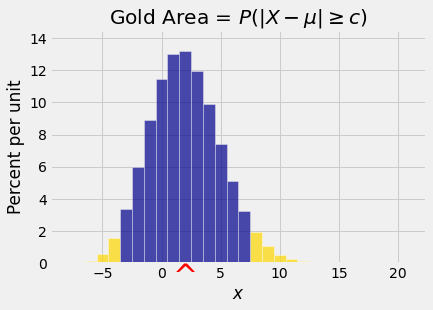

In [3]:
# NO CODE

Plot(dist2, event=tails, show_ev=True)
plt.xlabel('$x$')
plt.title('Gold Area = $P(|X - \mu| \geq c)$');

The absolute deviation $\vert X - \mu \vert$ is a non-negative random variable, so we could try to use Markov's inequality to get an upper bound on $P(\vert X - \mu \vert \ge c)$. But the bound would involve $E(\vert X - \mu \vert)$ which we don't know.

We do however know a lot about the *squared* deviation $(X - \mu)^2$. So let's use that instead. We can apply Markov's inequality to it because it is non-negative.

$$
\begin{align*}
P(\vert X - \mu \vert \ge c) ~ &= ~ P((X - \mu)^2 \ge c^2) \\
&\le ~ \frac{E((X - \mu)^2)}{c^2} \\
&= ~ \frac{\sigma^2}{c^2}
\end{align*}
$$

### Chebyshev's Bound ###

We have just proved **Chebyshev's Inequality**:

Let $X$ be a random variable with expectation $\mu$ and SD $\sigma$. Then for all $c > 0$,

$$
P(\vert X - \mu \vert \ge c) ~ \le ~ \frac{\sigma^2}{c^2} ~ = ~ \frac{Var(X)}{c^2}
$$

This is an upper bound on the total of two tails when the tails start at equal distances on either side of the mean.

For example, suppose a random variable $X$ has expectation 60 and SD 5. What is the chance that it is outside the interval $(50, 70)$?

We can't find the exact value of the chance because we don't know the shape of the distribution of $X$. But the interval $(50, 70)$ is symmetric about the expectation $\mu = 60$, so we can use Chebyshev's inequality to get an upper bound on the chance.

$$
P(X \notin (50, 70) ~ = ~ P(\vert X - 60 \vert \ge 10) ~ \le \frac{5^2}{10^2} ~ = ~ \frac{1}{4}
$$

Equivalently,

$$
P(X \in (50, 70)) ~ \ge ~ \frac{3}{4}
$$

### Chebyshev's Inequality Restated ###

To understand better what Chebyshev's inequality tells us about tails of distributions, let's change how we measure distances.

- Call $E(X)$ the origin.
- Measure distances in units of $SD(X)$.

The figure below shows a red arrow at the new origin $E(X)$ and blue arrows a unit distance away at $E(X) - SD(X)$ and $E(X) + SD(X)$. 

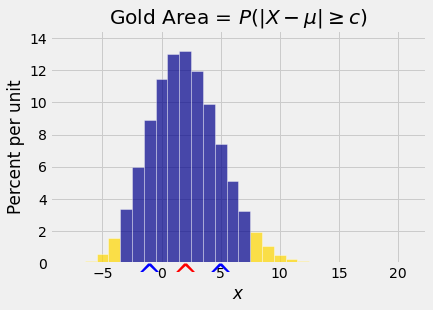

In [4]:
# NO CODE

Plot(dist2, event=tails, show_ev=True, show_sd=True)
plt.xlabel('$x$')
plt.title('Gold Area = $P(|X - \mu| \geq c)$');

Now let's consider the chance that a random variable is at least $k$ SDs away from its mean. We can bound this chance by writing an equivalent form of Chebyshev's inequality:

Let $X$ be a random variable with mean $\mu$ and SD $\sigma$. Then for all $k > 0$,

$$
P(\vert X - \mu \vert \ge k\sigma) ~ \le ~ \frac{\sigma^2}{k^2\sigma^2} ~ = ~ \frac{1}{k^2}
$$

The most important point about Chebyshev's inequality is that it makes no assumption about the shape of the distribution. **No matter what the shape of the distribution of $X$**,

- the chance that $X$ is at least 2 SDs away from its mean is at most $1/4$
- the chance that $X$ is at least 3 SDs away from its mean is at most $1/9$
- the chance that $X$ is at least 4 SDs away from its mean is at most $1/16$
- the chance that $X$ is at least 5 SDs away from its mean is at most $1/25$

Thus *no matter what the shape of the distribution*, it is overwhelmingly likely that the value of $X$ will be in the range "mean plus or minus a few SDs".

This result is one of the two principal reasons for using the SD as a measure of spread. If you know the mean and the SD of a distribution, you have a pretty good sense of where the bulk of the probability lies.

### Bound on One Tail ###

Suppose we want an upper bound on just one tail, as in the figure below. The right hand tail probability is $P(X - \mu \ge c)$.

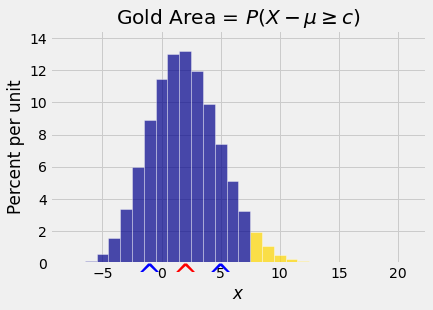

In [5]:
# NO CODE

Plot(dist2, event=right_tail, show_ev=True, show_sd=True)
plt.xlabel('$x$')
plt.title('Gold Area = $P(X - \mu \geq c)$');

Chebyshev's inequality gives an upper bound on the total of two tails starting at equal distances on either side of the mean: $P(\vert X - \mu \vert \ge c)$.

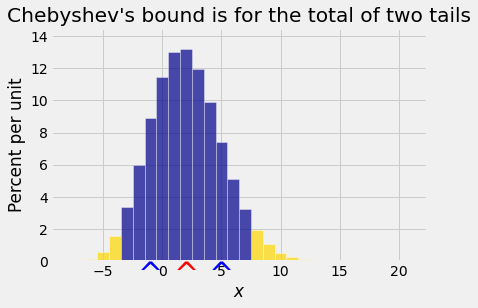

In [6]:
# NO CODE

Plot(dist2, event=tails, show_ev=True, show_sd=True)
plt.xlabel('$x$')
plt.title("""Chebyshev's bound is for the total of two tails""");

It is tempting to use half of Chebyshev's bound as the bound for one tail but the figure above shows why that doesn't work. The two tails don't have to be equal. Indeed, in the figure above they visibly aren't equal.

So the best we can do is note that each single tail is no bigger than the total of the two tails, and hence

$$
P(X - \mu \ge c) ~ \le ~ P(\vert X - \mu \vert \ge c) ~ \le ~ \frac{Var(X)}{c^2}
$$

We'll just use the same upper bound for one tail as we did for two. Remember that these are bounds, not exact values or approximations.

For example, suppose $X$ is a non-negative random variable with expectation 60 and SD 5. What can we say about $P(X \ge 70)$?

Since $X$ is non-negative, we could just apply Markov's inequality:

$$
P(X \ge 70) ~ \le ~ \frac{60}{70} ~ = ~ \frac{6}{7}
$$

But we could also try Chebyshev's bound:

$$
P(X \ge 70) ~ = ~ P(X - 60 \ge 10) ~ \le ~ \frac{5^2}{10^2} ~ = ~ \frac{1}{4}
$$

Both bounds are correct:

- $P(X \ge 70) \le 6/7$
- $P(X \ge 70) \le 1/4$

But Chebyshev's bound is clearly better. It says the chance can be no more than 25%, whereas Markov's bound places the ceiling unnecessarily high at about 86%.

When both bounds apply, Chebyshev's bound is often better even though it is a bound for two tails, because it uses both the mean and the SD instead of just the mean. 